# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts, with many of its customers being wholesalers. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
retail_data = pd.read_csv('online_retail.csv')
retail_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [2]:
variable_data = pd.read_csv('variable_explanation.csv')
pd.set_option('display.max_colwidth', 150)
variable_data

Variable  \
0    InvoiceNo   
1    StockCode   
2  Description   
3     Quantity   
4  InvoiceDate   
5    UnitPrice   
6   CustomerID   
7      Country   

                                                                                                                         Explanation  
0  A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation.  
1                                                              A 5-digit integral number uniquely assigned to each distinct product.  
2                                                                                                                Product (item) name  
3                                                                              The quantities of each product (item) per transaction  
4                                                                               The day and time when each transaction was generated  
5                                                                                         Product price per unit in sterling (pound)  
6                                                                       A 5-digit integral number uniquely assigned to each customer  
7                                                                                The name of the country where each customer resides

In [3]:
retail_data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [4]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail_data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Here, We will drop Invoice No, Stock code, and customerID

In [6]:
retail_data = retail_data.drop(columns=['InvoiceNo','StockCode','CustomerID'])
retail_data

Description  Quantity    InvoiceDate  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6   12/1/10 8:26   
1                       WHITE METAL LANTERN         6   12/1/10 8:26   
2            CREAM CUPID HEARTS COAT HANGER         8   12/1/10 8:26   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6   12/1/10 8:26   
4            RED WOOLLY HOTTIE WHITE HEART.         6   12/1/10 8:26   
...                                     ...       ...            ...   
541904          PACK OF 20 SPACEBOY NAPKINS        12  12/9/11 12:50   
541905         CHILDREN'S APRON DOLLY GIRL          6  12/9/11 12:50   
541906        CHILDRENS CUTLERY DOLLY GIRL          4  12/9/11 12:50   
541907      CHILDRENS CUTLERY CIRCUS PARADE         4  12/9/11 12:50   
541908        BAKING SET 9 PIECE RETROSPOT          3  12/9/11 12:50   

        UnitPrice         Country  
0            2.55  United Kingdom  
1            3.39  United Kingdom  
2            2.75  United Kingdom  
3            3.39  United Kingdom  
4            3.39  United Kingdom  
...           ...             ...  
541904       0.85          France  
541905       2.10          France  
541906       4.15          France  
541907       4.15          France  
541908       4.95          France  

[541909 rows x 5 columns]

In [7]:
retail_data.InvoiceDate = pd.to_datetime(retail_data['InvoiceDate'])
retail_data.head()

Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice         Country  
0       2.55  United Kingdom  
1       3.39  United Kingdom  
2       2.75  United Kingdom  
3       3.39  United Kingdom  
4       3.39  United Kingdom

In [8]:
print(retail_data.info())
print(retail_data.shape)
print(541909-540455)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  540455 non-null  object        
 1   Quantity     541909 non-null  int64         
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   UnitPrice    541909 non-null  float64       
 4   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 20.7+ MB
None
(541909, 5)
1454


In [9]:
retail_data.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [10]:
retail_data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
retail_data.UnitPrice.unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

### Now We will see United Kingdom and will analyse the Data of united kingdom

In [13]:
retail_uk = retail_data[retail_data.Country == 'United Kingdom']
retail_uk.shape

(495478, 5)

**495478 data points out of 540455 belongs to United Kingdom. Now we will do exploratory data analysis on retail data which belongs to United kingdom**

In [14]:
retail_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  494024 non-null  object        
 1   Quantity     495478 non-null  int64         
 2   InvoiceDate  495478 non-null  datetime64[ns]
 3   UnitPrice    495478 non-null  float64       
 4   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 22.7+ MB


There are few null values in Description. Lets count the percentage of null values in retail_uk

In [15]:
x = round((((495478-494024)/495478)*100),4)
print(x)

0.2935


**There is only 0.2935% of null values in retail dataset. Therefore we will drop all rows containing null values.**

In [16]:
retail_uk = retail_uk.dropna()
retail_uk.shape

(494024, 5)

In [17]:
retail_uk.describe()

Quantity      UnitPrice
count  494024.000000  494024.000000
mean        8.658361       4.545762
std       227.539276      99.461178
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.100000
75%        10.000000       4.130000
max     80995.000000   38970.000000

**lets plot the scatterplot of invoicedate and quantity**

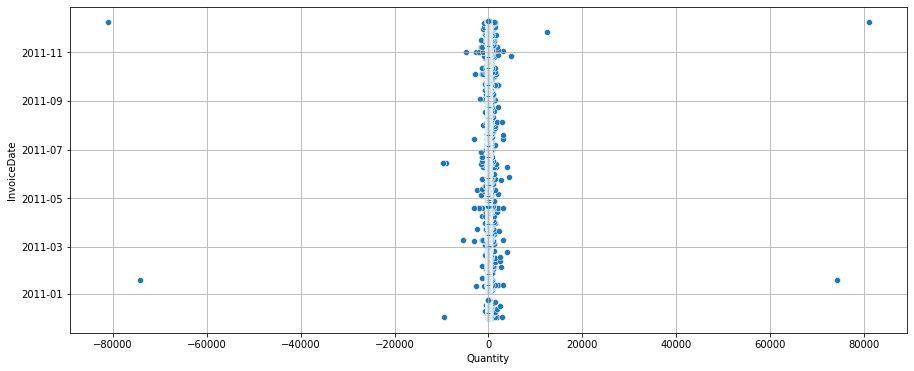

In [19]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=retail_uk, x='Quantity', y='InvoiceDate',)
plt.grid()
plt.show()

**Above Scatter Plot describe that maximum amount of quantity is concentrated around zero** 

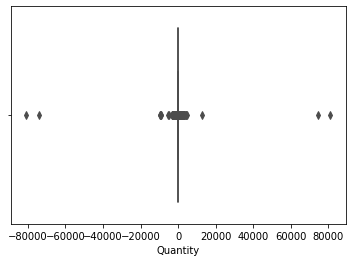

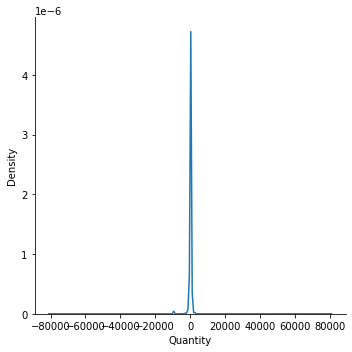

In [20]:
sns.boxplot(data=retail_uk, x='Quantity', color='Red')
sns.displot(data=retail_uk, x='Quantity', kind = 'kde')

In [21]:
Q3 = 10.0
Q1 = 1.0
iqr = Q3-Q1
print("The IQR is:", iqr)
minimum = (Q1 - 1.5*(iqr))
print("Minimum value is:", minimum)
maximum = (Q3 + 1.5*(iqr))
print("Maximum value is:", maximum)

The IQR is: 9.0
Minimum value is: -12.5
Maximum value is: 23.5


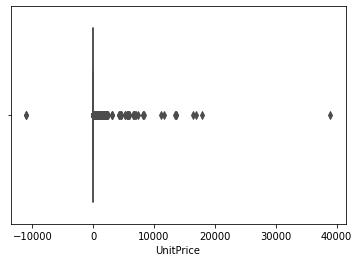

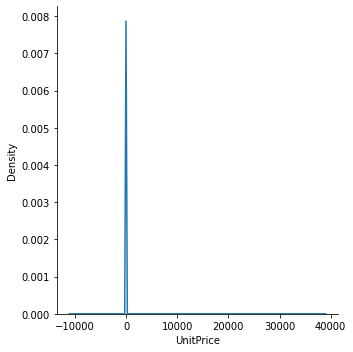

In [22]:
sns.boxplot(data=retail_uk, x='UnitPrice', color='Red')
sns.displot(data=retail_uk, x='UnitPrice', kind = 'kde')

In [23]:
Q3 = 4.130000
Q1 = 1.250000
iqr = Q3-Q1
print("The IQR is:", iqr)
minimum = (Q1 - 1.5*(iqr))
print("Minimum value is:", minimum)
maximum = (Q3 + 1.5*(iqr))
print("Maximum value is:", maximum)

The IQR is: 2.88
Minimum value is: -3.0700000000000003
Maximum value is: 8.45


In [24]:
drop_max = retail_uk[retail_uk['UnitPrice'] >= 7.45].index
drop_min = retail_uk[retail_uk['UnitPrice'] < -3.0700000000000003].index
retail_uk.drop(drop_max, inplace=True)
retail_uk.drop(drop_min, inplace=True)
drop_max_q = retail_uk[retail_uk['Quantity'] >= 23.5].index
drop_min_q = retail_uk[retail_uk['Quantity'] <= -12.5].index 
retail_uk.drop(drop_max_q, inplace=True)
retail_uk.drop(drop_min_q, inplace=True)
retail_uk.shape

(391599, 5)

In [25]:
print(((494024-411530)/494024)*100)

16.69837902612019


In [26]:
retail_uk

Description  Quantity         InvoiceDate  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                       WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2            CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4            RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   
...                                     ...       ...                 ...   
541887   SET 6 SCHOOL MILK BOTTLES IN CRATE         4 2011-12-09 12:31:00   
541888       ZINC T-LIGHT HOLDER STAR LARGE        12 2011-12-09 12:31:00   
541889       FAIRY TALE COTTAGE NIGHT LIGHT        12 2011-12-09 12:31:00   
541890  LARGE CAKE STAND  HANGING STRAWBERY         8 2011-12-09 12:49:00   
541893                DOORMAT RED RETROSPOT        10 2011-12-09 12:49:00   

        UnitPrice         Country  
0            2.55  United Kingdom  
1            3.39  United Kingdom  
2            2.75  United Kingdom  
3            3.39  United Kingdom  
4            3.39  United Kingdom  
...           ...             ...  
541887       3.75  United Kingdom  
541888       0.95  United Kingdom  
541889       1.95  United Kingdom  
541890       2.95  United Kingdom  
541893       7.08  United Kingdom  

[391599 rows x 5 columns]

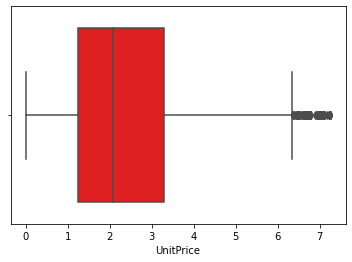

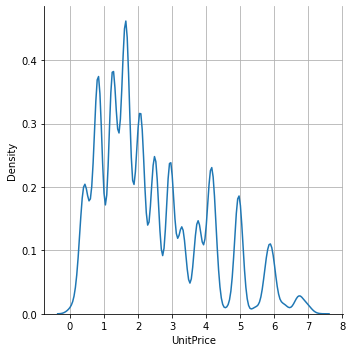

In [27]:
sns.boxplot(data=retail_uk, x='UnitPrice', color='Red')
sns.displot(data=retail_uk, x='UnitPrice', kind = 'kde')
plt.grid()

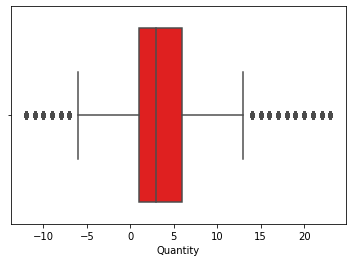

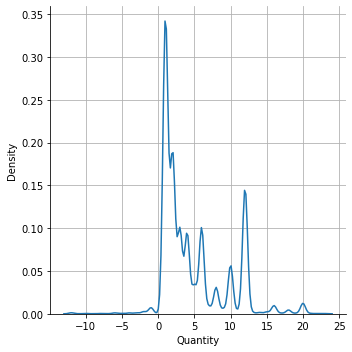

In [28]:
sns.boxplot(data=retail_uk, x='Quantity', color='Red')
sns.displot(data=retail_uk, x='Quantity', kind = 'kde')
plt.grid()

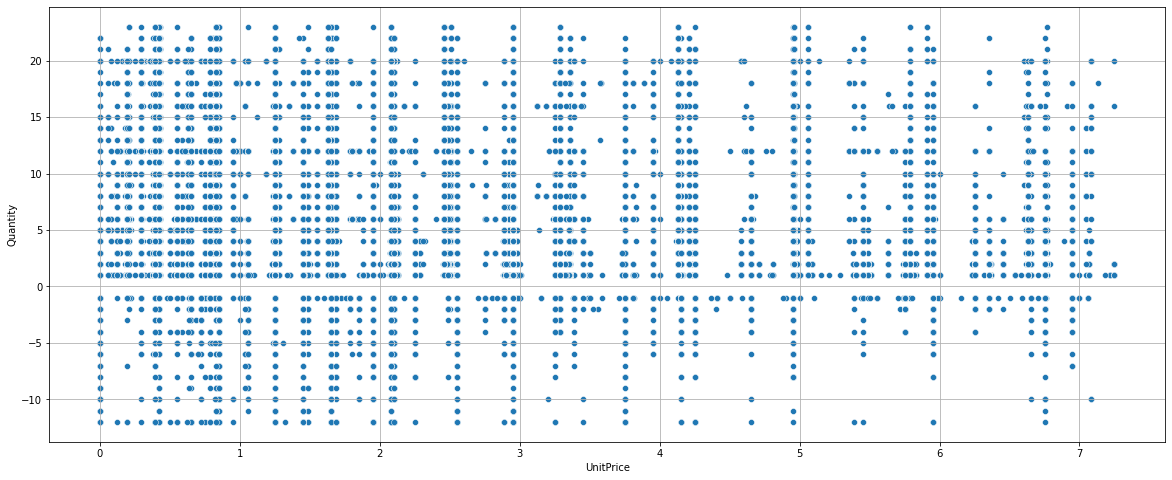

In [29]:
plt.figure(figsize=(20,8))
palette = sns.color_palette("mako_r", 6)
sns.scatterplot(data=retail_uk, x='UnitPrice', y='Quantity', markers=True, palette=palette)
plt.grid()

In [30]:
retail_uk['InvoiceDate'] = retail_uk['InvoiceDate'].dt.date
retail_uk

Description  Quantity InvoiceDate  UnitPrice  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6  2010-12-01       2.55   
1                       WHITE METAL LANTERN         6  2010-12-01       3.39   
2            CREAM CUPID HEARTS COAT HANGER         8  2010-12-01       2.75   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6  2010-12-01       3.39   
4            RED WOOLLY HOTTIE WHITE HEART.         6  2010-12-01       3.39   
...                                     ...       ...         ...        ...   
541887   SET 6 SCHOOL MILK BOTTLES IN CRATE         4  2011-12-09       3.75   
541888       ZINC T-LIGHT HOLDER STAR LARGE        12  2011-12-09       0.95   
541889       FAIRY TALE COTTAGE NIGHT LIGHT        12  2011-12-09       1.95   
541890  LARGE CAKE STAND  HANGING STRAWBERY         8  2011-12-09       2.95   
541893                DOORMAT RED RETROSPOT        10  2011-12-09       7.08   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541887  United Kingdom  
541888  United Kingdom  
541889  United Kingdom  
541890  United Kingdom  
541893  United Kingdom  

[391599 rows x 5 columns]

In [31]:
retail_uk['sales'] = (retail_uk.Quantity*retail_uk.UnitPrice)
retail_uk_sales = retail_uk[['InvoiceDate','sales']]
#retail_uk_sales.set_index('InvoiceDate') 
retail_uk_sales = retail_uk_sales.set_index(pd.DatetimeIndex(retail_uk_sales['InvoiceDate']))
retail_uk_sales

InvoiceDate  sales
InvoiceDate                   
2010-12-01   2010-12-01  15.30
2010-12-01   2010-12-01  20.34
2010-12-01   2010-12-01  22.00
2010-12-01   2010-12-01  20.34
2010-12-01   2010-12-01  20.34
...                 ...    ...
2011-12-09   2011-12-09  15.00
2011-12-09   2011-12-09  11.40
2011-12-09   2011-12-09  23.40
2011-12-09   2011-12-09  23.60
2011-12-09   2011-12-09  70.80

[391599 rows x 2 columns]

In [32]:
retail_uk_monthly_sales = retail_uk_sales['sales'].resample('M').sum()
retail_uk_monthly_sales = pd.DataFrame(retail_uk_monthly_sales)
retail_uk_monthly_sales

sales
InvoiceDate            
2010-12-31   293248.190
2011-01-31   222303.110
2011-02-28   195200.080
2011-03-31   251684.510
2011-04-30   210209.891
2011-05-31   281380.080
2011-06-30   247510.430
2011-07-31   259471.461
2011-08-31   254113.090
2011-09-30   384359.352
2011-10-31   428420.650
2011-11-30   570880.360
2011-12-31   172494.730

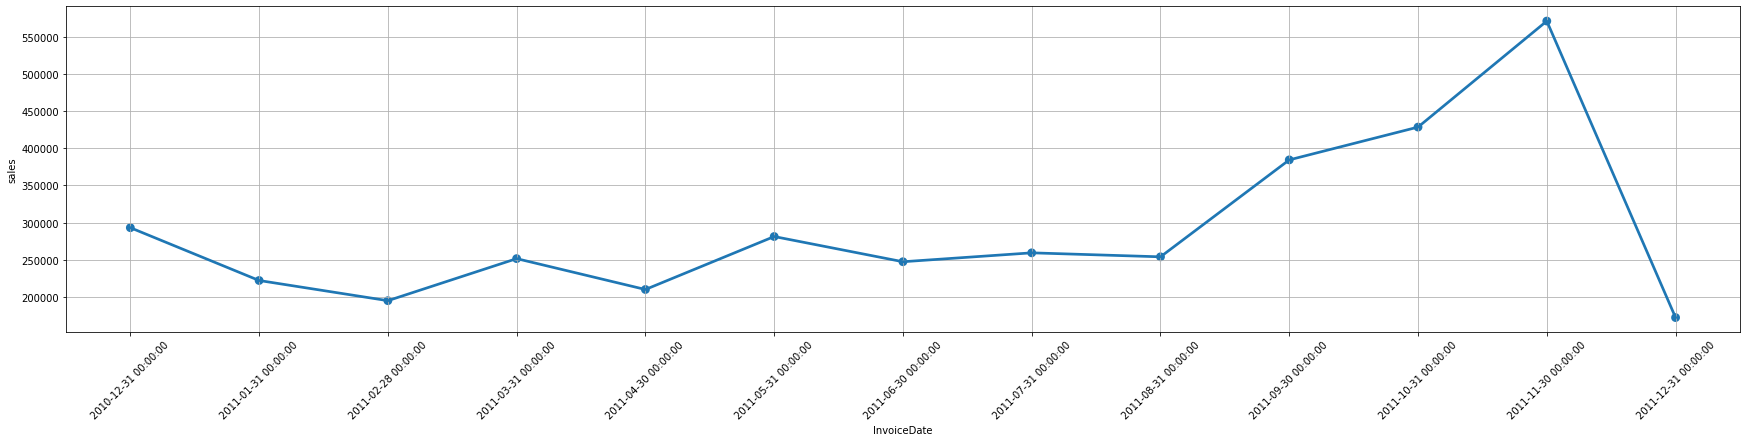

In [33]:
plt.figure(figsize=(30,6))
sns.pointplot(data=retail_uk_monthly_sales, x=retail_uk_monthly_sales.index, y=retail_uk_monthly_sales['sales'])
plt.xticks(rotation=45)
plt.grid()

In [34]:
retail_uk_sales=retail_uk_sales.drop(columns=['InvoiceDate'])
retail_uk_weekly_sales = retail_uk_sales['sales'].resample('w').sum()
retail_uk_weekly_sales = pd.DataFrame(retail_uk_weekly_sales)
retail_uk_weekly_sales

sales
InvoiceDate            
2010-12-05    71092.910
2010-12-12   113697.360
2010-12-19    81826.410
2010-12-26    26631.510
2011-01-02        0.000
2011-01-09    49173.130
2011-01-16    56238.580
2011-01-23    56057.090
2011-01-30    52365.400
2011-02-06    47427.460
2011-02-13    37826.600
2011-02-20    49147.970
2011-02-27    58746.250
2011-03-06    50395.250
2011-03-13    52512.330
2011-03-20    55866.900
2011-03-27    54650.780
2011-04-03    61813.690
2011-04-10    51513.340
2011-04-17    60068.921
2011-04-24    52309.980
2011-05-01    36872.980
2011-05-08    58644.470
2011-05-15    78235.790
2011-05-22    78661.690
2011-05-29    53501.180
2011-06-05    44875.950
2011-06-12    66521.560
2011-06-19    56336.380
2011-06-26    53250.450
2011-07-03    46440.140
2011-07-10    68061.470
2011-07-17    55435.690
2011-07-24    66149.950
2011-07-31    58658.191
2011-08-07    57860.500
2011-08-14    55633.480
2011-08-21    56230.080
2011-08-28    60693.050
2011-09-04    59224.870
2011-09-11    72129.560
2011-09-18    91883.090
2011-09-25    98655.711
2011-10-02    94894.941
2011-10-09   104176.010
2011-10-16    95923.430
2011-10-23    92772.790
2011-10-30   101076.340
2011-11-06   116685.460
2011-11-13   137946.250
2011-11-20   135377.620
2011-11-27   132244.010
2011-12-04   131441.720
2011-12-11   115419.270

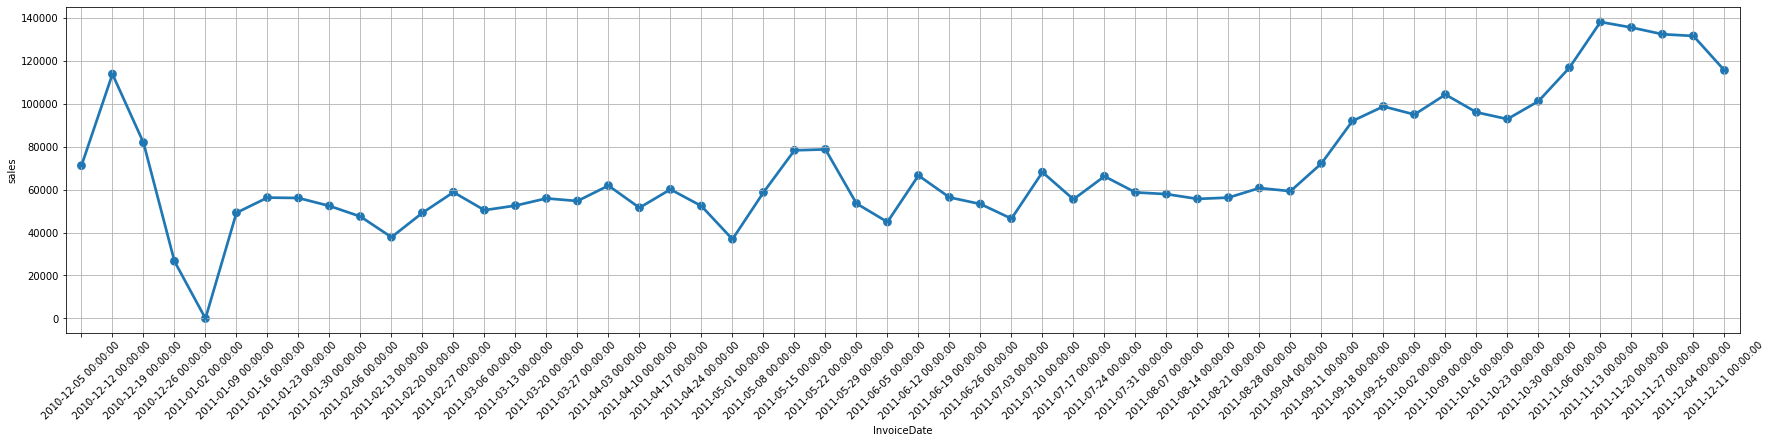

In [35]:
plt.figure(figsize=(30,6))
sns.pointplot(data=retail_uk_weekly_sales, x=retail_uk_weekly_sales.index, y=retail_uk_weekly_sales['sales'])
plt.xticks(rotation=45)
plt.grid()

(array([150000., 200000., 250000., 300000., 350000., 400000., 450000.,
        500000., 550000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

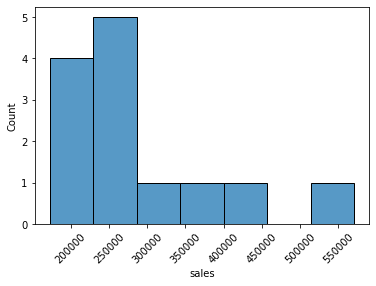

In [36]:
sns.histplot(data=retail_uk_monthly_sales, x=retail_uk_monthly_sales['sales'])
plt.xticks(rotation=45)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

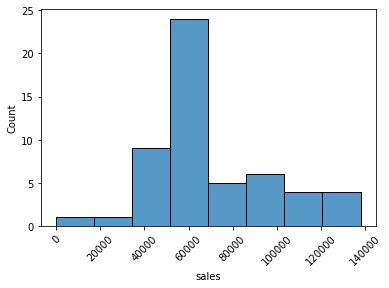

In [37]:
sns.histplot(data=retail_uk_weekly_sales, x=retail_uk_weekly_sales['sales'])
plt.xticks(rotation=45)

In [38]:
retail_uk_day_time = retail_data[retail_data['Country'] == 'United Kingdom']
retail_uk_day_time

Description  Quantity         InvoiceDate  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                       WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2            CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4            RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   
...                                     ...       ...                 ...   
541889       FAIRY TALE COTTAGE NIGHT LIGHT        12 2011-12-09 12:31:00   
541890  LARGE CAKE STAND  HANGING STRAWBERY         8 2011-12-09 12:49:00   
541891     SET OF 3 HANGING OWLS OLLIE BEAK        24 2011-12-09 12:49:00   
541892        RED RETROSPOT ROUND CAKE TINS        24 2011-12-09 12:49:00   
541893                DOORMAT RED RETROSPOT        10 2011-12-09 12:49:00   

        UnitPrice         Country  
0            2.55  United Kingdom  
1            3.39  United Kingdom  
2            2.75  United Kingdom  
3            3.39  United Kingdom  
4            3.39  United Kingdom  
...           ...             ...  
541889       1.95  United Kingdom  
541890       2.95  United Kingdom  
541891       1.25  United Kingdom  
541892       8.95  United Kingdom  
541893       7.08  United Kingdom  

[495478 rows x 5 columns]

In [39]:
drop_max = retail_uk_day_time[retail_uk_day_time['UnitPrice'] >= 7.45].index
drop_min = retail_uk_day_time[retail_uk_day_time['UnitPrice'] < -3.0700000000000003].index
retail_uk_day_time.drop(drop_max, inplace=True)
retail_uk_day_time.drop(drop_min, inplace=True)
drop_max_q = retail_uk_day_time[retail_uk_day_time['Quantity'] >= 23.5].index
drop_min_q = retail_uk_day_time[retail_uk_day_time['Quantity'] <= -12.5].index 
retail_uk_day_time.drop(drop_max_q, inplace=True)
retail_uk_day_time.drop(drop_min_q, inplace=True)
retail_uk_day_time.shape

(392401, 5)

[Source of dataset](https://archive.ics.uci.edu/ml/datasets/online+retail#).

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).